In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt 

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
print(train.shape)
print(test.shape)

(27455, 785)
(7172, 785)


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
# Create training and testing arrays
train_set = np.array(train, dtype = 'float32')
test_set = np.array(test, dtype='float32')

In [6]:
#Specifying class labels
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G',
               'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

(-0.5, 27.5, 27.5, -0.5)

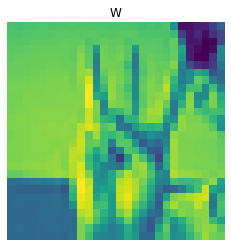

In [7]:
#See a random image for class label verification
i = random.randint(1,27455)
plt.imshow(train_set[i,1:].reshape((28,28))) 

plt.imshow(train_set[i,1:].reshape((28,28))) 
label_index = train["label"][i]
plt.title(f"{class_names[label_index]}")
plt.axis('off')

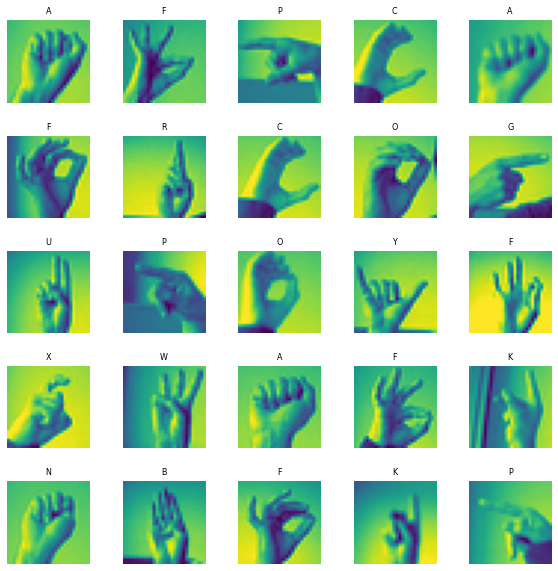

In [8]:
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5
fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_set) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_set[index,1:].reshape((28,28)) )
    label_index = int(train_set[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [9]:
# Prepare the training and testing dataset 
X_train = train_set[:, 1:] / 255
y_train = train_set[:, 0]

X_test = test_set[:, 1:] / 255
y_test = test_set[:,0]

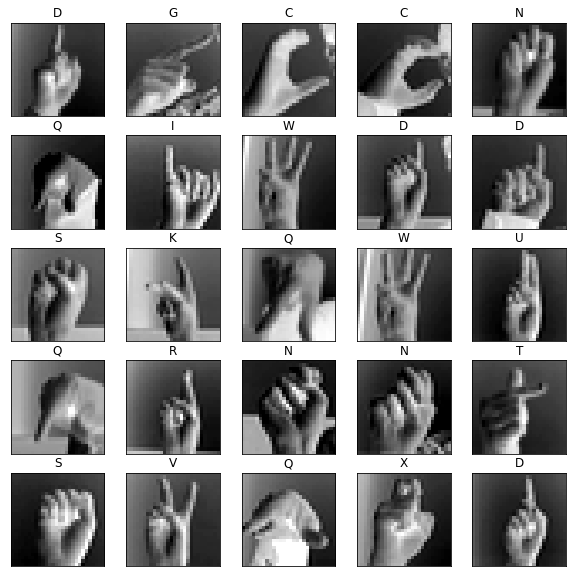

In [10]:
#Visualize train images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [11]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(21964, 784)
(21964,)


In [12]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(21964, 28, 28, 1)
(21964,)
(5491, 28, 28, 1)


In [13]:
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
# from keras.callbacks import TensorBoard

In [14]:
#Defining the Convolutional Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 25, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [15]:
#Compiling
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [16]:
#Training the CNN model
history = model.fit(X_train, y_train, batch_size = 512, epochs = 50, 
                        verbose = 1, validation_data = (X_validate, y_validate))

Epoch 1/50
43/43 [==============================] - 16s 324ms/step - loss: 3.1602 - accuracy: 0.0621 - val_loss: 3.0039 - val_accuracy: 0.1333
Epoch 2/50
43/43 [==============================] - 10s 226ms/step - loss: 2.6045 - accuracy: 0.1881 - val_loss: 2.0356 - val_accuracy: 0.4048
Epoch 3/50
43/43 [==============================] - 12s 272ms/step - loss: 1.8214 - accuracy: 0.3964 - val_loss: 1.2827 - val_accuracy: 0.5995
Epoch 4/50
43/43 [==============================] - 14s 334ms/step - loss: 1.3221 - accuracy: 0.5465 - val_loss: 0.9117 - val_accuracy: 0.7041
Epoch 5/50
43/43 [==============================] - 14s 315ms/step - loss: 1.0347 - accuracy: 0.6383 - val_loss: 0.7001 - val_accuracy: 0.7773
Epoch 6/50
43/43 [==============================] - 14s 323ms/step - loss: 0.8555 - accuracy: 0.6995 - val_loss: 0.5130 - val_accuracy: 0.8478
Epoch 7/50
43/43 [==============================] - 14s 332ms/step - loss: 0.7050 - accuracy: 0.7535 - val_loss: 0.3960 - val_accuracy: 0.8922

Text(0.5, 1.0, 'Accuracy evolution')

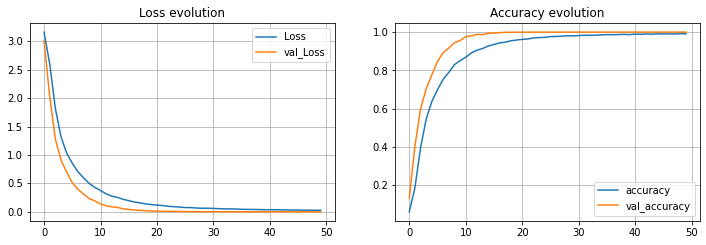

In [17]:
#VIsualizing the training performance
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.grid()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.grid()
plt.title('Accuracy evolution')

In [18]:
#Predictions for the test data
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis = 1)

In [41]:
X_test[0].shape

(28, 28, 1)

In [48]:
data = X_test[0].reshape(1, X_test[0].shape[0], X_test[0].shape[1], X_test[0].shape[2])
result = model.predict(data)
result = np.argmax(result, axis = 1)
result

array([6], dtype=int64)

In [38]:
predicted_classes

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

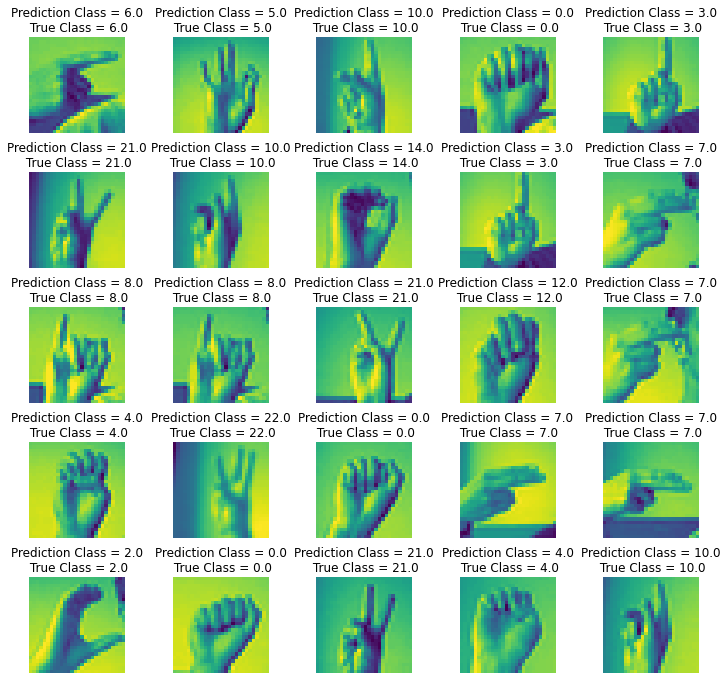

In [19]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title(f"Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [20]:
#Classification accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.9578918014500837


In [28]:
model.save('../application/static/sign_language_model.h5')  # creates a HDF5 file 'my_model.h5'